In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [15]:
# Step 2: Load the dataset from the provided JSON URL
url = "https://flipsidecrypto.xyz/api/v1/queries/df5aac1f-f336-4871-8e02-80071852aed9/data/latest"

# Fetch JSON data using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    df_original = pd.DataFrame(data)
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(df_original.columns)

Index(['DATE', 'TVLUSD', 'PRICE', 'PRICESTDDEV', 'TRADESCOUNT',
       'TRADINGVOLUSD', 'TRADINGVOLUSDLEAD'],
      dtype='object')


In [16]:
# Step 3: Data preprocessing

df1 = df_original.copy()

#Convert 'DATE' to datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Extract features from 'DATE'
df1['day_of_week'] = df1['DATE'].dt.dayofweek
df1['month'] = df1['DATE'].dt.month
df1['day_of_month'] = df1['DATE'].dt.day

# Drop unnecessary columns 
#df = df.drop(columns = ['DAYOFMONTH', 'DAYNAME'])

df1.head()

,DATE,TVLUSD,PRICE,PRICESTDDEV,TRADESCOUNT,TRADINGVOLUSD,TRADINGVOLUSDLEAD,day_of_week,month,day_of_month
0,2024-04-17,2.578754e+09,1.140,0.019948,59625,4.152047e+08,NaN,2,4,17
1,2024-04-16,2.718271e+09,1.140,0.015511,88734,5.708597e+08,4.152047e+08,1,4,16
2,2024-04-15,2.674556e+09,1.175,0.043068,99134,7.935301e+08,5.708597e+08,0,4,15
3,2024-04-14,2.556153e+09,1.110,0.046296,107220,9.613617e+08,7.935301e+08,6,4,14
4,2024-04-13,2.707827e+09,1.160,0.076286,82269,8.095336e+08,9.613617e+08,5,4,13


In [17]:
# STep 4: Define features (inputs) and target variable (output)
# Drop rows where TRADINGVOLUSDLEAD is NaN
df = df1.dropna(subset=['TRADINGVOLUSDLEAD'])

x = df.drop(columns=['TRADINGVOLUSDLEAD', 'DATE'])  # Features
y = df['TRADINGVOLUSDLEAD']  # Target variable


In [18]:
#Step 5: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [19]:
#Step 6 : Model Training
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [20]:
#Step 7: model evaluation
#Predict on the test set
y_pred = model.predict(x_test)

#Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 6.674789814008707e+16
Mean Absolute Error: 149670444.95716482


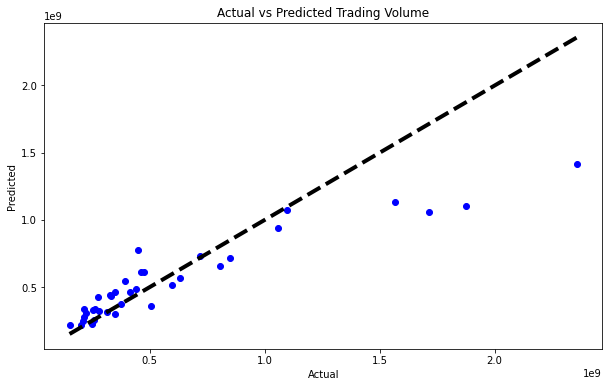

In [21]:
#step 8: Visitualization
#Plotting actual vs Predicted Values
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Trading Volume')
plt.show()

In [26]:
# Step 9: Prepare today's data for prediction
# Get the latest date from the original DataFrame
today_date = df1['DATE'].max()

# Filter today's data
today_data = df1[df1['DATE'] == today_date]

# Drop 'TRADINGVOLUMEUSD' and 'DATE' columns
today_data = today_data.drop(columns=['TRADINGVOLUSDLEAD', 'DATE'])

print(today_data)

         TVLUSD  PRICE  PRICESTDDEV  TRADESCOUNT  TRADINGVOLUSD  day_of_week  \
0  2.578754e+09   1.14     0.019948        59625   4.152047e+08            2   

   month  day_of_month  
0      4            17  


In [28]:
# Step 10: Predict next day and next week trading volume

# Make prediction for next day's trading volume
next_day_prediction = model.predict(today_data)

# Print prediction
print("Next Day Trading Volume Prediction:", next_day_prediction)

# Print prediction with formatted number
print("Next Day Trading Volume Prediction: ${:,.2f}".format(next_day_prediction[0]))


Next Day Trading Volume Prediction: [5.10720221e+08]
Next Day Trading Volume Prediction: $510,720,221.13
